<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab7/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №7 по вычислительной математике

Державин Андрей, Б01-909

## Задача X.9.3

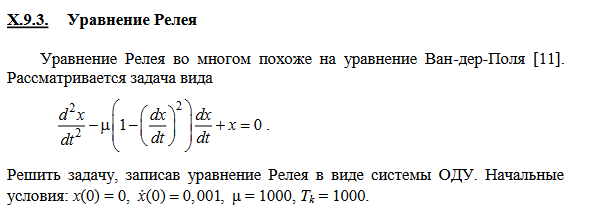

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Описание метода

Имеем уравнение Рэлея:
$$
\frac{d^2x}{dt^2} - \mu \left( 1 -  \left(\frac{dx}{dt}\right)^2\right)
\frac{dx}{dt} + x = 0
$$
С Н.У.:
$$
x(0) = 0, \:\:\:\:\:\:\:\:\:\:\:\: \dot{x}(0) = 0.001
$$
Вводя замену $y = \frac{dx}{dt}$, перейдём к системе:
$$
\left\lbrace
\begin{matrix}
  \frac{dx}{dt} &=& y\\
  \frac{dy}{dt} &=& \mu \left( 1 -  y^2\right)y - x
\end{matrix}
\right.
$$
С Н.У.:
$$
x(0) = 0, \:\:\:\:\:\:\:\:\:\:\:\: y(0) = 0.001
$$
Для удобства обозначим
$$
\overrightarrow{u} = \left[\begin{matrix} x\\y\end{matrix} \right], \:\:\:\:\:\:\:\:\:\:\:\:
\overrightarrow{u_0} = \left[\begin{matrix} x(0)\\y(0)\end{matrix} \right] = 
\left[\begin{matrix} 0\\0.001\end{matrix} \right]
$$
$$
f\left(\overrightarrow{u}\right) = \left[
\begin{matrix}
y\\
\mu \left( 1 -  y^2\right)y - x
\end{matrix}
\right]
$$
Тогда наша система принимает окончательный вид:
$$
\dot{\overrightarrow{u}} = f\left(\overrightarrow{u}\right)
$$

Будем использовать метод Розенброка со следующими формулами:
$$
\overrightarrow{u_{n+1}} = \overrightarrow{u_{n}} + \tau \cdot\Re\left(\overrightarrow{k}\right)
\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:
\left(
  E - \frac{1+j}{2}\tau f_u(\overrightarrow{y_n}, t)
\right) \overrightarrow{k} = f\left(\overrightarrow{y_n}, t + \frac{\tau}{2}\right)
$$
В силу автономности системы:
$$
\left(
  E -  \frac{1+j}{2}\tau f_u(\overrightarrow{y_n})
\right) \overrightarrow{k} = f(\overrightarrow{y_n})
$$
где $E$ - единичная матрица, $f_u$ - матрица Якоби системы


### Реализация 

In [3]:
# service class
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  def __str__(self):
    return f'({self.x}, {self.y})'
  
  def __repr__(self):
    return f'({self.x}, {self.y})'

  def __add__(self, other):
    return Point(self.x + other.x, self.y + other.y)

  def __sub__(self, other):
    return Point(self.x - other.x, self.y - other.y)

  def __mul__(self, num):
    return Point(self.x * num, self.y * num)

  def __div__(self, num):
    return Point(self.x / num, self.y / num)

In [18]:
x0 = 0
xdot0 = 0.001
p0 = Point(x0, xdot0)

c_p = Point(0, 0)

mu = 1000
T_k = 1000 # конечное время

In [16]:
def func(time, u:Point) -> Point:
  return Point(u.y, mu * (1 - u.y * u.y) * u.y - u.x)

def jac(time, u:Point):
  return np.matrix([
    [0, 1],
    [-1, mu * (1 - 3 * u.y * u.y)]
  ])

def Rosenbrock(t_end, p0:Point, tau):
  u_prev = p0
  u = [u_prev]
  times = np.arange(0, t_end + tau, tau)
  for t_n in times[1:]:
    # matrix
    mat = np.identity(2) - jac(t_n, u_prev) * tau * (1 + 1j) / 2
    col = func(t_n, u_prev)

    k = np.real(np.linalg.solve(mat, [col.x, col.y]))
    k = Point(k[0], k[1])

    u_next = u_prev + k * tau
    u_prev = u_next
    u.append(u_next)

  return u, times

def SolveNPrint(time, start_p:Point, center_p:Point, method, step = 1e-3):
  u, ts = method(time, start_p, step)
  u = np.array(u) - center_p
  
  plt.figure(figsize=[20, 10])

  plt.title(f'Временная зависимость $x(t)$')
  plt.plot(ts, [i.x for i in u], 'b.')
  plt.xlabel('$t$', fontsize=20)
  plt.ylabel('$x(t)$', fontsize=20)
  plt.grid()

  plt.show()
  plt.plot([i.x for i in u], [i.y for i in u], "b.")

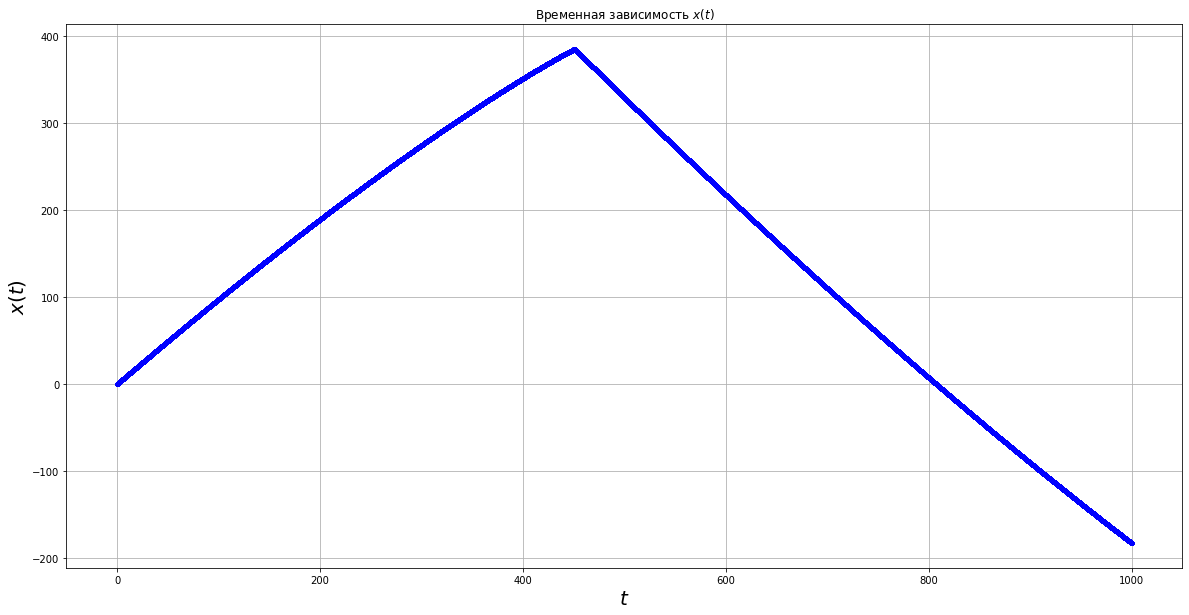

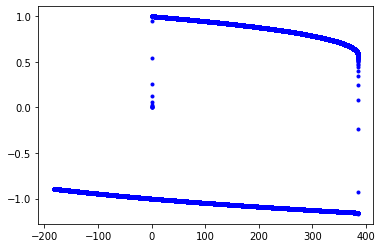

In [19]:
SolveNPrint(T_k, p0, c_p, Rosenbrock)